# Chapter 18: A Framework for Comparison

For additional context see chapter 18 of [The Virus of Variation](https://www.brokenquality.com/book). Questions? Email James.Lehner@gmail.com or QualityIsBroken@gmail.com.

In [1]:
# Import libraries
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
import pandas as pd
from process_improvement import xmr_charts as xmr

%matplotlib inline

## Get the data

In [2]:
# Get data function
def get_data(dataset_url) -> pd.DataFrame:
    return pd.read_csv(dataset_url)

## Get data for temporal comparison

In [3]:
# Death-to-birth rates for temporal comparison dataset url
temporal_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation/refs/heads/main/data/temporal-comparison-death-to-birth-rates.csv'

# Get data
temporal_df = get_data(temporal_url)

# Make 'Year' column dtype string
temporal_df['Year'] = temporal_df['Year'].astype('string')

# Drop 'Note', 'Births', and 'Deaths' columns
temporal_df = temporal_df.drop(['Note', 
                                'Births', 
                                'Deaths'], axis=1)

# Show dataframe
temporal_df.head()

,Hospital,Stage,Year,Rate
0,Vienna General Hospital,Period 1,1784,2.1
1,Vienna General Hospital,Period 1,1785,1.4
2,Vienna General Hospital,Period 1,1786,0.4
3,Vienna General Hospital,Period 1,1787,0.4
4,Vienna General Hospital,Period 1,1788,0.4


## Split dataframe according to hospital

In [4]:
# Create Vienna dataframe
vienna_df = temporal_df[temporal_df['Hospital'].str.contains('Vienna')]

# Create Dublin dataframe
dublin_df = temporal_df[temporal_df['Hospital'].str.contains('Dublin')].reset_index(drop=True)

## Split hospital dataframes according to stages

In [5]:
# Dublin period 1 is 1784 to 1793
dublin_1_df = dublin_df[dublin_df['Stage'] == 'Period 1'].copy()
# Calculate moving ranges
dublin_1_df['Moving Range'] = abs(dublin_1_df['Rate'].diff())

# Dublin period 2 is 1831 to 1840
dublin_2_df = (dublin_df[dublin_df['Stage'] == 'Period 2']
               .reset_index(drop=True))
# Calculate moving ranges
dublin_2_df['Moving Range'] = abs(dublin_2_df['Rate'].diff())

# Show dataframe
dublin_2_df

,Hospital,Stage,Year,Rate,Moving Range
0,Dublin Maternity Hospital,Period 2,1831,0.6,NaN
1,Dublin Maternity Hospital,Period 2,1832,0.5,0.1
2,Dublin Maternity Hospital,Period 2,1833,0.6,0.1
3,Dublin Maternity Hospital,Period 2,1834,1.7,1.1
4,Dublin Maternity Hospital,Period 2,1835,1.8,0.1
5,Dublin Maternity Hospital,Period 2,1836,2.0,0.2
6,Dublin Maternity Hospital,Period 2,1837,1.3,0.7
7,Dublin Maternity Hospital,Period 2,1838,2.1,0.8
8,Dublin Maternity Hospital,Period 2,1839,1.3,0.8
9,Dublin Maternity Hospital,Period 2,1840,1.7,0.4


In [6]:
# Vienna period 1 is 1784 to 1793
vienna_1_df = vienna_df[vienna_df['Stage'] == 'Period 1'].copy()
# Calculate moving ranges
vienna_1_df['Moving Range'] = abs(vienna_1_df['Rate'].diff())

# Vienna period 2 is 1831 to 1840
vienna_2_df = (vienna_df[vienna_df['Stage'] == 'Period 2']
               .reset_index(drop=True))
# Calculate moving ranges
vienna_2_df['Moving Range'] = abs(vienna_2_df['Rate'].diff())

# Show dataframe
vienna_2_df

,Hospital,Stage,Year,Rate,Moving Range
0,Vienna General Hospital,Period 2,1831,6.6,NaN
1,Vienna General Hospital,Period 2,1832,3.2,3.4
2,Vienna General Hospital,Period 2,1833,5.3,2.1
3,Vienna General Hospital,Period 2,1834,7.7,2.4
4,Vienna General Hospital,Period 2,1835,5.6,2.1
5,Vienna General Hospital,Period 2,1836,7.5,1.9
6,Vienna General Hospital,Period 2,1837,9.1,1.6
7,Vienna General Hospital,Period 2,1838,3.0,6.1
8,Vienna General Hospital,Period 2,1839,5.4,2.4
9,Vienna General Hospital,Period 2,1840,9.2,3.8


## Get data for physical comparison

In [7]:
# Death-to-birth rates for temporal comparison dataset url
physical_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation/refs/heads/main/data/physical-comparison-death-to-birth-rates.csv'

# Get data
physical_df = get_data(physical_url)

# Make 'Year' column dtype string
physical_df['Year'] = physical_df['Year'].astype('string')

# Drop 'Note', 'Births', and 'Deaths' columns
physical_df = physical_df.drop(['Note', 
                                'Births', 
                                'Deaths'], axis=1)

# Show dataframe
physical_df.head()

,Hospital,Year,Rate
0,Vienna General Hospital,1784,2.1
1,Vienna General Hospital,1785,1.4
2,Vienna General Hospital,1786,0.4
3,Vienna General Hospital,1787,0.4
4,Vienna General Hospital,1788,0.4


In [8]:
# Split physical_df according to Hospital
vienna_physical_df = physical_df[physical_df['Hospital'].str.contains('Vienna')]
# Calculate moving range

# Create dublin physical dataframe
dublin_physical_df = physical_df[physical_df['Hospital'].str.contains('Dublin')].reset_index(drop=True)

## Figure 18.4: Temporal comparison of rates at Dublin Maternity Hospital

In [9]:
# Create list of dublin dataframes
dublin_df_list = [dublin_1_df, dublin_2_df]
# Create list of dublin labels
dublin_label_list = ['Dublin - 1784 to 1793', 'Dublin - 1831 to 1840']

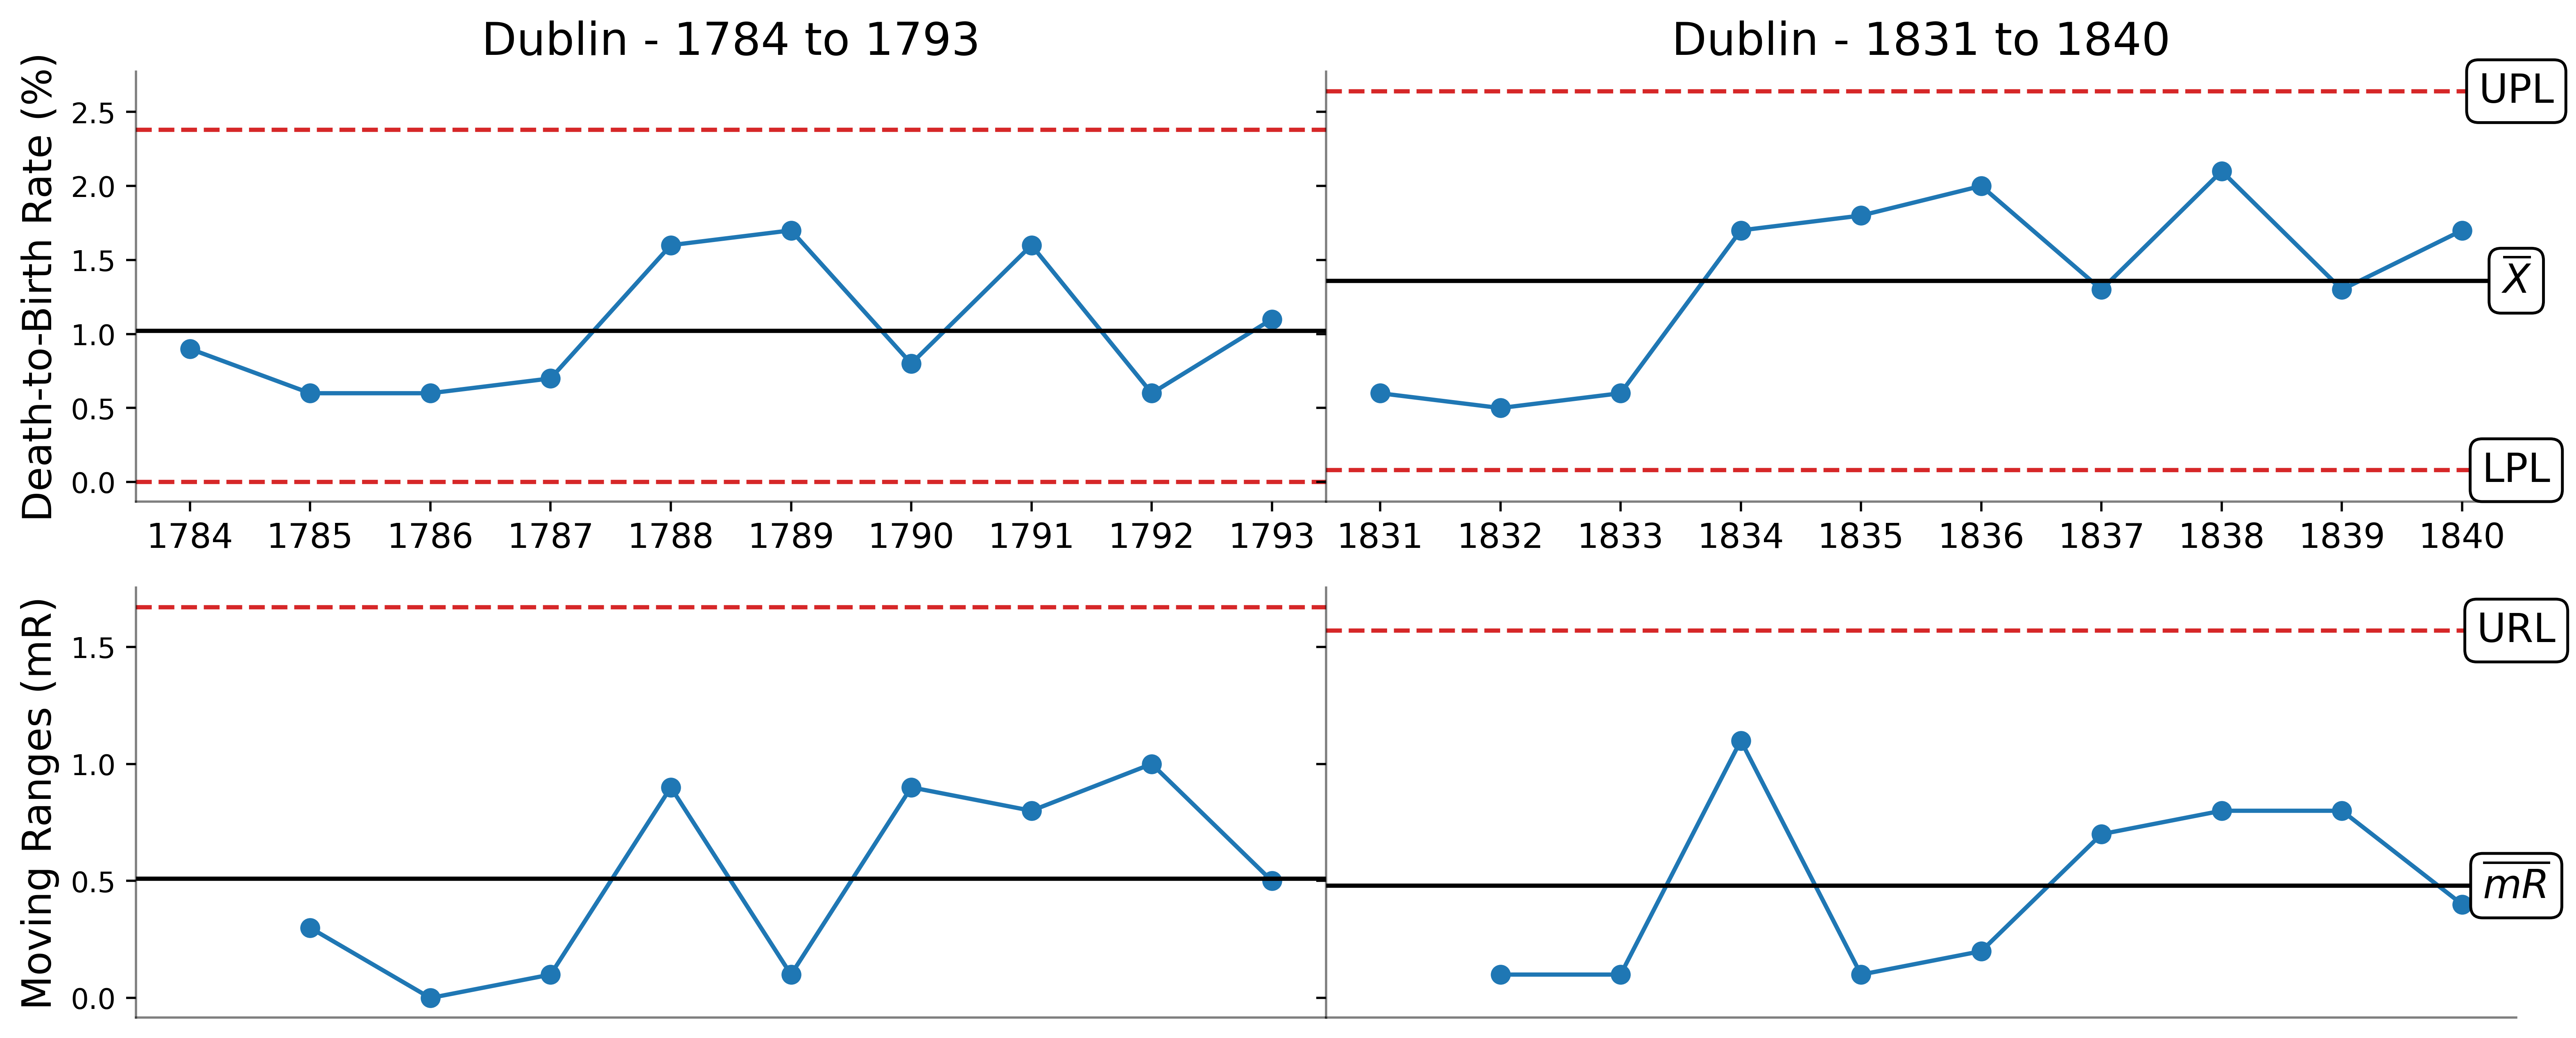

In [10]:
# Specify round_value and tickinterval
round_value = 2
tickinterval = 1
# Specify condition
condition = 'Rate'
labels = 'Year'

# Specify df_list and plot_label_list
df_list = dublin_df_list
plot_label_list = dublin_label_list

# Define plotting parameters
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6), dpi=500, sharey='row')
plt.subplots_adjust(wspace=0)

# Initialize an empty list to store stats for each dataframe
stats_list = []

# Loop through the df_list and plot on the axes
for idx, (df, label) in enumerate(zip(df_list, plot_label_list)):

    data = df[condition]
    moving_range = round(abs(data.diff()), round_value).copy()
    moving_range.iloc[0] = np.nan
    xticks = df[labels]

    # Specify scaling factors
    E2 = 2.660
    D4 = 3.268

    # Calculate statistics for UPL and LPL
    mean = round(data.mean(), round_value)
    average_mR = round(moving_range.mean(), round_value)
    UPL = round(mean + (E2 * average_mR), round_value)
    LPL = round(max(mean - (E2 * average_mR), 0), round_value)
    URL = round(D4 * average_mR, round_value)

    # Characterize process
    if ((data < LPL) | (data > UPL)).any():
        characterization = "Unpredictable"
    elif (moving_range > URL).any():  # Add condition for moving range exceeding the URL
        characterization = "Unpredictable"
    else:
        characterization = "Predictable"

    # Store statistics in the list
    stats_list.append({
        'Label': label,
        'Mean': mean,
        'Ave. mR': average_mR,
        'UPL': UPL,
        'LPL': LPL,
        'URL': URL,
        'PLR': UPL-LPL,
        'Characterization': characterization
    })

    # Plot individual values in the first two subplots (top row)
    axes[0, idx].plot(data, marker='o')
    # Masking and plotting limits
    axes[0, idx].plot(np.ma.masked_where(data < UPL, data), marker='o', ls='none', color='red', markeredgecolor='black', markersize=9)
    axes[0, idx].plot(np.ma.masked_where(data > LPL, data), marker='o', ls='none', color='red', markeredgecolor='black', markersize=9)
    axes[0, idx].set_title(label, fontsize=16)

    # Add UPL and LPL horizontal lines for individual values plot
    axes[0, idx].axhline(UPL, color='tab:red', linestyle='--')
    axes[0, idx].axhline(LPL, color='tab:red', linestyle='--')
    axes[0, idx].axhline(mean, color='black', linestyle='-')
    
    # Set x-tick labels with separate intervals
    tick_positions = np.arange(0, len(xticks), tickinterval)
        
    axes[0, idx].set_xticks(tick_positions)
    axes[0, idx].set_xticklabels(xticks.iloc[tick_positions], rotation=0, ha='center', fontsize=12)

    # Plot moving range in the second row
    axes[1, idx].plot(moving_range, marker='o')
    
    # Offset moving range by 1 relative to the individual values
    for xi, yi in zip(labels, moving_range):
        if np.isnan(yi):
            axes[1, idx].plot(xi, 0, marker='x', color='white', markersize=0)

    # Add UPL and LPL horizontal lines for moving range plot
    axes[1, idx].axhline(URL, color='tab:red', linestyle='--')
    axes[1, idx].axhline(average_mR, color='black', linestyle='-')
    axes[1, idx].plot(np.ma.masked_where(moving_range < URL, moving_range), marker='o', ls='none', color='red', markeredgecolor='black', markersize=9)

    # Add label to y-axes
    axes[0, 0].set_ylabel('Death-to-Birth Rate (%)', fontsize=14)
    axes[1, 0].set_ylabel('Moving Ranges (mR)', fontsize=14)
    
    # Establish bbox properties
    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)

    # Add labels to 2nd and 4th plots
    if idx == 1:
        axes[0, idx].text(axes[0, idx].get_xlim()[1], UPL, 'UPL', color='black', ha='center', va='center',
                          fontsize=14, bbox=bbox_props)
        axes[0, idx].text(axes[0, idx].get_xlim()[1], LPL, 'LPL', color='black', ha='center', va='center', 
                          fontsize=14, bbox=bbox_props)
        axes[0, idx].text(axes[0, idx].get_xlim()[1], mean, r'$\overline{X}$', color='black', ha='center', va='center',
                          fontsize=14, bbox=bbox_props)

    if idx == 1:
        axes[1, idx].text(axes[1, idx].get_xlim()[1], URL, 'URL', color='black', ha='center', va='center', 
                          fontsize=14, bbox=bbox_props)
        axes[1, idx].text(axes[1, idx].get_xlim()[1], average_mR, r'$\overline{mR}$', 
                          color='black', ha='center', va='center', 
                          fontsize=14, bbox=bbox_props)

    # Remove ticks on xticks for moving ranges
    axes[1, idx].set_xticks([])
    
    # Loop through the axes and set spine width
    for ax_row in axes:
        for ax in ax_row:
            for spine in ax.spines.values():
                spine.set_alpha(0.5)

# Stylize plots
sns.despine()
    
# Convert stats list into DataFrame
dublin_stats_df = pd.DataFrame(stats_list)

In [11]:
# Show process statistics for comparison
dublin_stats_df

,Label,Mean,Ave. mR,UPL,LPL,URL,PLR,Characterization
0,Dublin - 1784 to 1793,1.02,0.51,2.38,0.00,1.67,2.38,Predictable
1,Dublin - 1831 to 1840,1.36,0.48,2.64,0.08,1.57,2.56,Predictable


## Figure 18.5: Temporal comparison of rates at Vienna General

In [12]:
# Create list of dublin dataframes
vienna_df_list = [vienna_1_df, vienna_2_df]
# Create list of dublin labels
vienna_label_list = ['Vienna - 1784 to 1793', 'Vienna - 1831 to 1840']

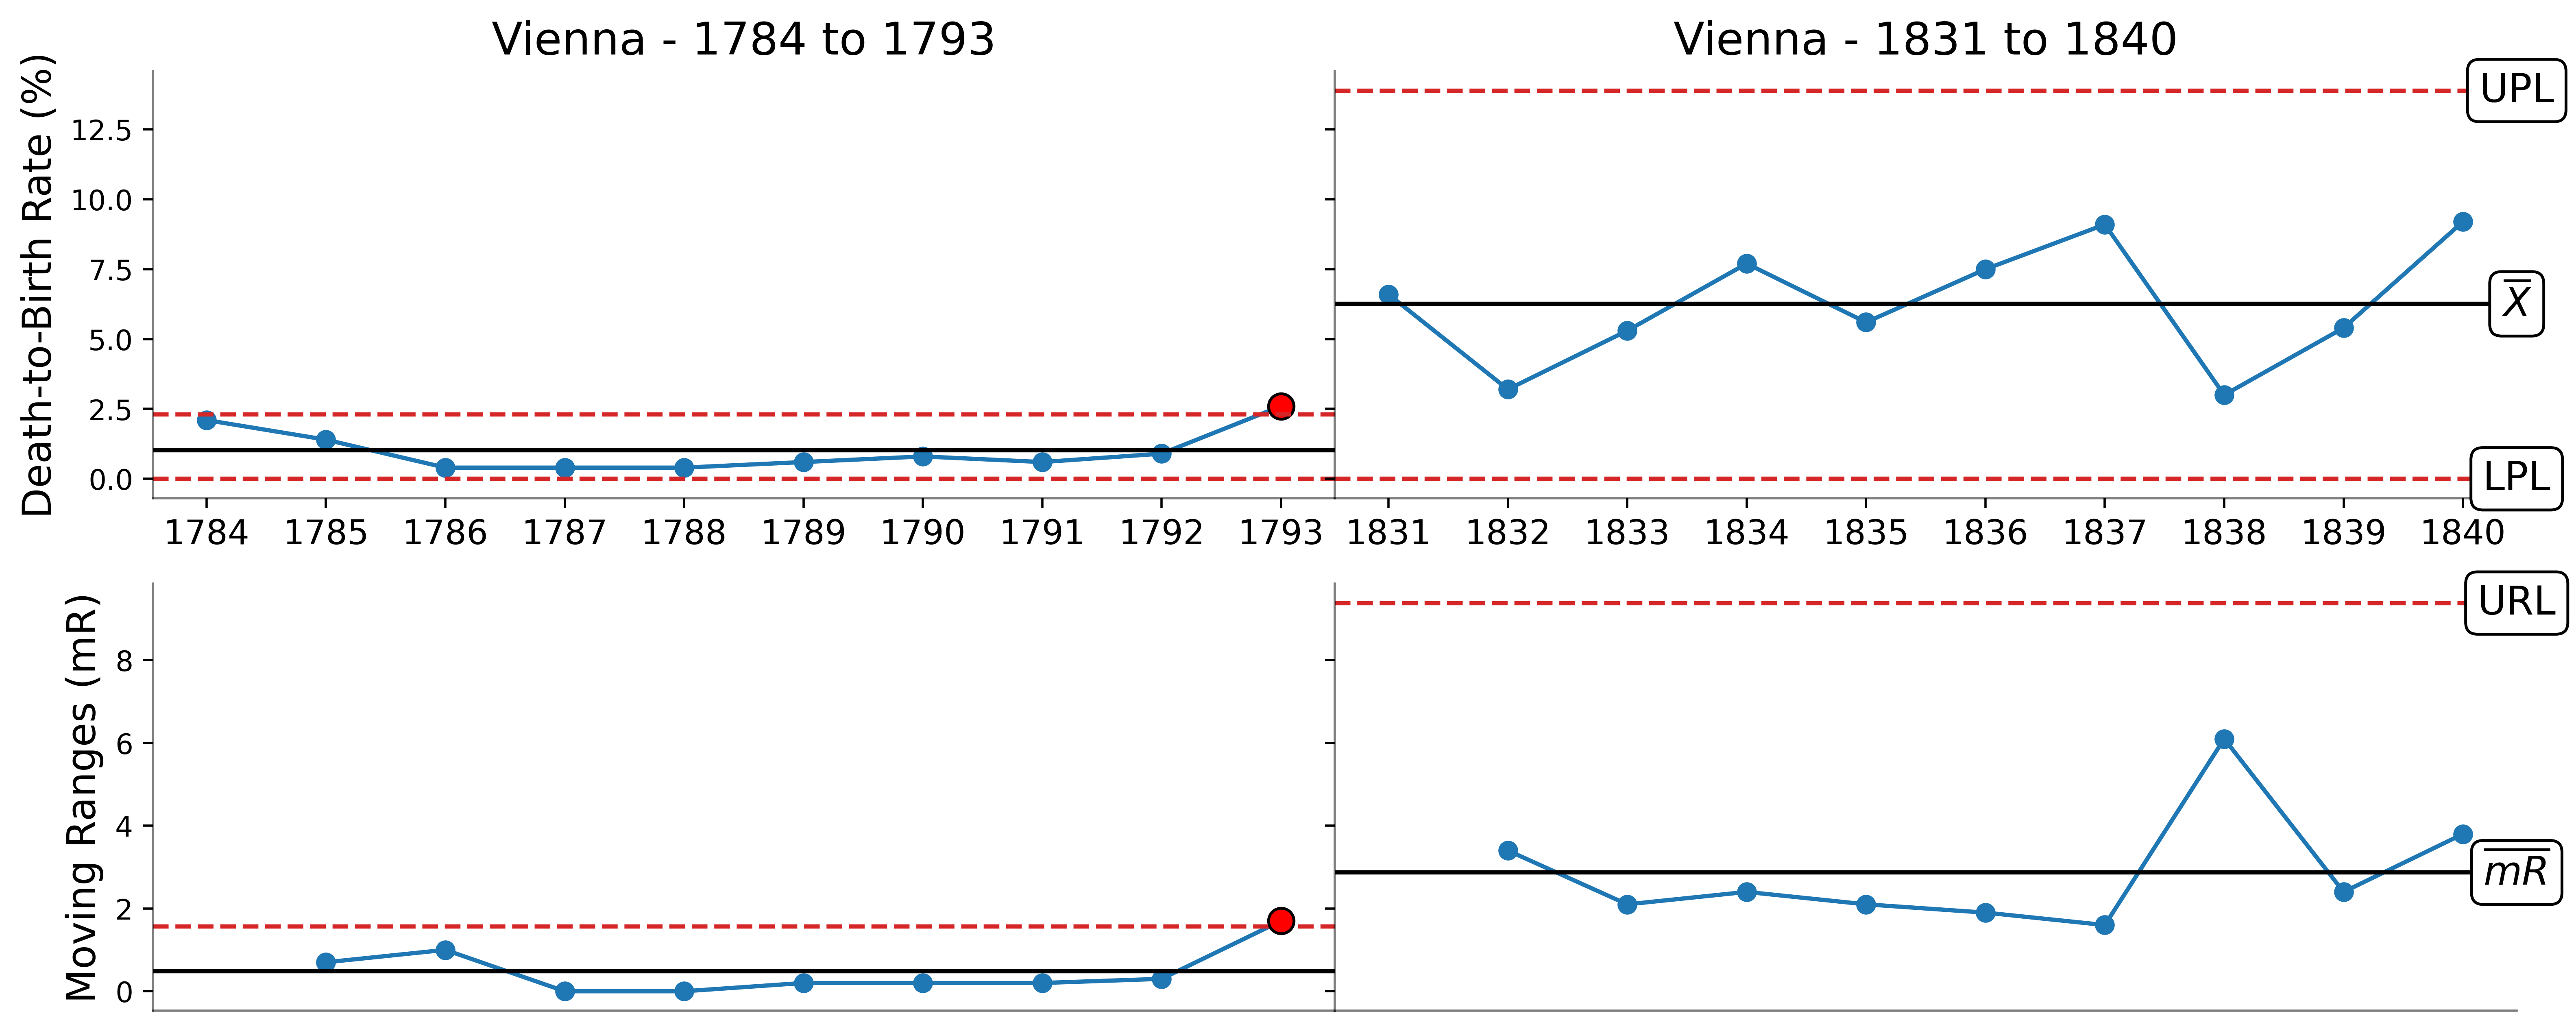

In [13]:
# Specify round_value and tickinterval
round_value = 2
tickinterval = 1
# Specify condition
condition = 'Rate'
labels = 'Year'

# Specify df_list and plot_label_list
df_list = vienna_df_list
plot_label_list = vienna_label_list

# Define plotting parameters
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6), dpi=500, sharey='row')
plt.subplots_adjust(wspace=0)

# Initialize an empty list to store stats for each dataframe
stats_list = []

# Loop through the df_list and plot on the axes
for idx, (df, label) in enumerate(zip(df_list, plot_label_list)):

    data = df[condition]
    moving_range = round(abs(data.diff()), round_value).copy()
    moving_range.iloc[0] = np.nan
    xticks = df[labels]

    # Specify scaling factors
    E2 = 2.660
    D4 = 3.268

    # Calculate statistics for UPL and LPL
    mean = round(data.mean(), round_value)
    average_mR = round(moving_range.mean(), round_value)
    UPL = round(mean + (E2 * average_mR), round_value)
    LPL = round(max(mean - (E2 * average_mR), 0), round_value)
    URL = round(D4 * average_mR, round_value)

    # Characterize process
    if ((data < LPL) | (data > UPL)).any():
        characterization = "Unpredictable"
    elif (moving_range > URL).any():  # Add condition for moving range exceeding the URL
        characterization = "Unpredictable"
    else:
        characterization = "Predictable"

    # Store statistics in the list
    stats_list.append({
        'Label': label,
        'Mean': mean,
        'Ave. mR': average_mR,
        'UPL': UPL,
        'LPL': LPL,
        'URL': URL,
        'PRL': UPL-LPL,
        'Characterization': characterization
    })

    # Plot individual values in the first two subplots (top row)
    axes[0, idx].plot(data, marker='o')
    # Masking and plotting limits
    axes[0, idx].plot(np.ma.masked_where(data < UPL, data), marker='o', ls='none', color='red', markeredgecolor='black', markersize=9)
    axes[0, idx].plot(np.ma.masked_where(data > LPL, data), marker='o', ls='none', color='red', markeredgecolor='black', markersize=9)
    axes[0, idx].set_title(label, fontsize=16)

    # Add UPL and LPL horizontal lines for individual values plot
    axes[0, idx].axhline(UPL, color='tab:red', linestyle='--')
    axes[0, idx].axhline(LPL, color='tab:red', linestyle='--')
    axes[0, idx].axhline(mean, color='black', linestyle='-')
    
    # Set x-tick labels with separate intervals
    tick_positions = np.arange(0, len(xticks), tickinterval)
        
    axes[0, idx].set_xticks(tick_positions)
    axes[0, idx].set_xticklabels(xticks.iloc[tick_positions], rotation=0, ha='center', fontsize=12)

    # Plot moving range in the second row
    axes[1, idx].plot(moving_range, marker='o')
    
    # Offset moving range by 1 relative to the individual values
    for xi, yi in zip(labels, moving_range):
        if np.isnan(yi):
            axes[1, idx].plot(xi, 0, marker='x', color='white', markersize=0)

    # Add UPL and LPL horizontal lines for moving range plot
    axes[1, idx].axhline(URL, color='tab:red', linestyle='--')
    axes[1, idx].axhline(average_mR, color='black', linestyle='-')
    axes[1, idx].plot(np.ma.masked_where(moving_range < URL, moving_range), marker='o', ls='none', color='red', markeredgecolor='black', markersize=9)

    # Add label to y-axes
    axes[0, 0].set_ylabel('Death-to-Birth Rate (%)', fontsize=14)
    axes[1, 0].set_ylabel('Moving Ranges (mR)', fontsize=14)
    
    # Establish bbox properties
    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)

    # Add labels to 2nd and 4th plots
    if idx == 1:
        axes[0, idx].text(axes[0, idx].get_xlim()[1], UPL, 'UPL', color='black', ha='center', va='center',
                          fontsize=14, bbox=bbox_props)
        axes[0, idx].text(axes[0, idx].get_xlim()[1], LPL, 'LPL', color='black', ha='center', va='center', 
                          fontsize=14, bbox=bbox_props)
        axes[0, idx].text(axes[0, idx].get_xlim()[1], mean, r'$\overline{X}$', color='black', ha='center', va='center',
                          fontsize=14, bbox=bbox_props)

    if idx == 1:
        axes[1, idx].text(axes[1, idx].get_xlim()[1], URL, 'URL', color='black', ha='center', va='center', 
                          fontsize=14, bbox=bbox_props)
        axes[1, idx].text(axes[1, idx].get_xlim()[1], average_mR, r'$\overline{mR}$', 
                          color='black', ha='center', va='center', 
                          fontsize=14, bbox=bbox_props)

    # Remove ticks on xticks for moving ranges
    axes[1, idx].set_xticks([])
    
    # Loop through the axes and set spine width
    for ax_row in axes:
        for ax in ax_row:
            for spine in ax.spines.values():
                spine.set_alpha(0.5)

# Stylize plots
sns.despine()
    
# Convert stats list into DataFrame
vienna_stats_df = pd.DataFrame(stats_list)

In [14]:
# Show process statistics for comparison
vienna_stats_df

,Label,Mean,Ave. mR,UPL,LPL,URL,PRL,Characterization
0,Vienna - 1784 to 1793,1.02,0.48,2.30,0,1.57,2.30,Unpredictable
1,Vienna - 1831 to 1840,6.26,2.87,13.89,0,9.38,13.89,Predictable


## Figure 18.6: Physical comparison XmR charts of Dublin Maternity Hospital and Vienna General

In [15]:
# Create list of dataframes
physical_comparison_df_list = [dublin_physical_df, vienna_physical_df]
# Create labels for comparison
physical_comparison_label_list = ['Dublin Maternity Hospital', 'Vienna General Hospital']

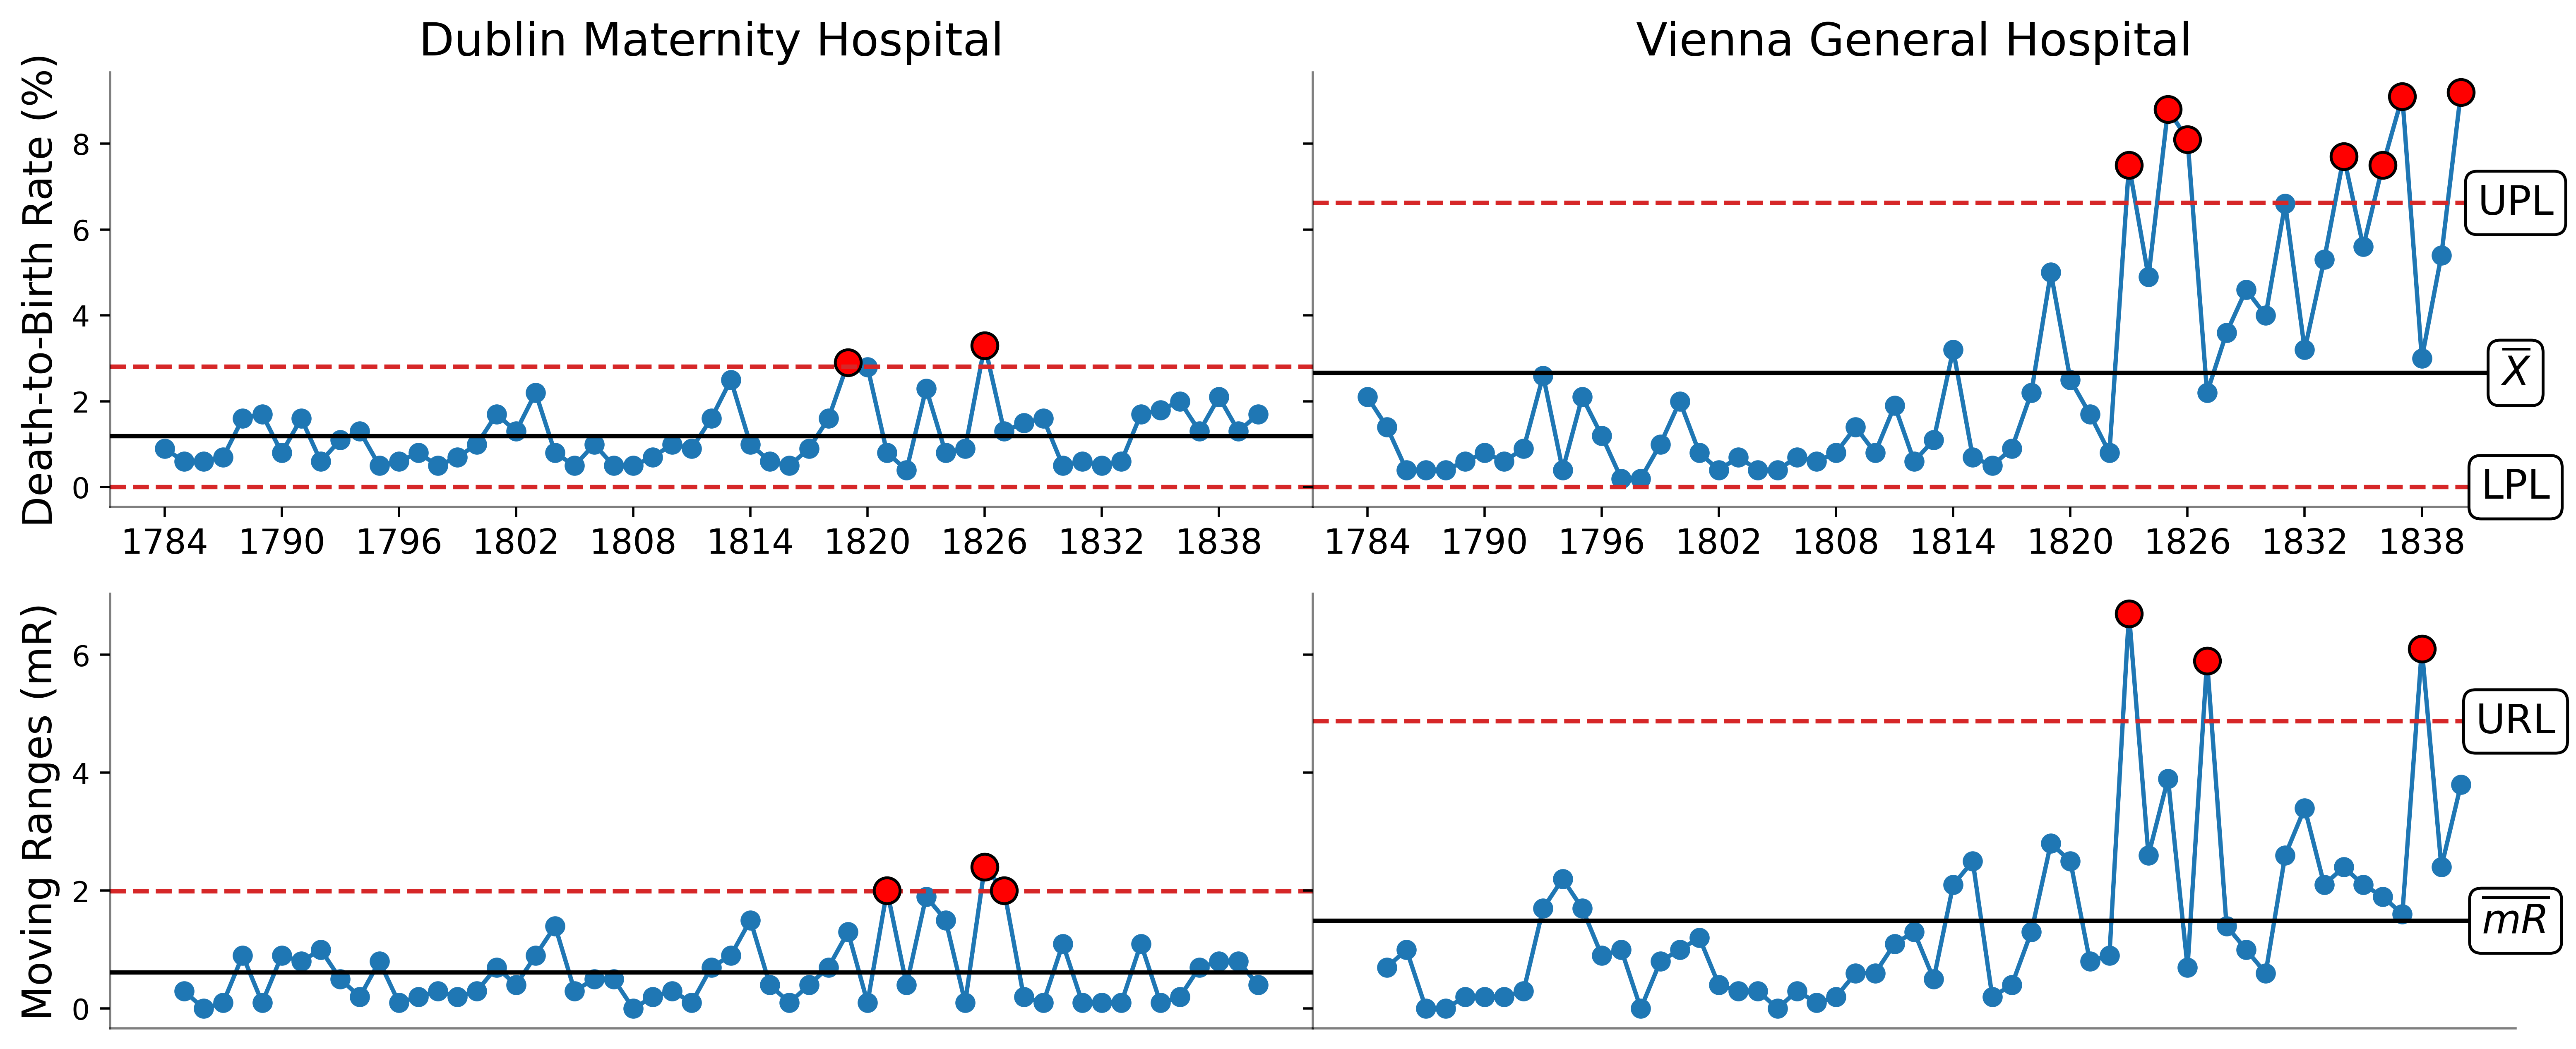

In [16]:
# Specify round_value and tickinterval
round_value = 2
tickinterval = 6

# Specify condition
condition = 'Rate'
labels = 'Year'

# Specify df_list and plot_label_list
df_list = physical_comparison_df_list
plot_label_list = physical_comparison_label_list

# Define plotting parameters
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6), dpi=500, sharey='row')
plt.subplots_adjust(wspace=0)

# Initialize an empty list to store stats for each dataframe
stats_list = []

# Loop through the df_list and plot on the axes
for idx, (df, label) in enumerate(zip(df_list, plot_label_list)):

    data = df[condition]
    moving_range = round(abs(data.diff()), round_value).copy()
    moving_range.iloc[0] = np.nan
    xticks = df[labels]

    # Specify scaling factors
    E2 = 2.660
    D4 = 3.268

    # Calculate statistics for UPL and LPL
    mean = round(data.mean(), round_value)
    average_mR = round(moving_range.mean(), round_value)
    UPL = round(mean + (E2 * average_mR), round_value)
    LPL = round(max(mean - (E2 * average_mR), 0), round_value)
    URL = round(D4 * average_mR, round_value)

    # Characterize process
    if ((data < LPL) | (data > UPL)).any():
        characterization = "Unpredictable"
    elif (moving_range > URL).any():  # Add condition for moving range exceeding the URL
        characterization = "Unpredictable"
    else:
        characterization = "Predictable"

    # Store statistics in the list
    stats_list.append({
        'Label': label,
        'Mean': mean,
        'Ave. mR': average_mR,
        'UPL': UPL,
        'LPL': LPL,
        'URL': URL,
        'PRL': UPL-LPL,
        'Characterization': characterization
    })

    # Plot individual values in the first two subplots (top row)
    axes[0, idx].plot(data, marker='o')
    # Masking and plotting limits
    axes[0, idx].plot(np.ma.masked_where(data < UPL, data), marker='o', ls='none', color='red', markeredgecolor='black', markersize=9)
    axes[0, idx].plot(np.ma.masked_where(data > LPL, data), marker='o', ls='none', color='red', markeredgecolor='black', markersize=9)
    axes[0, idx].set_title(label, fontsize=16)

    # Add UPL and LPL horizontal lines for individual values plot
    axes[0, idx].axhline(UPL, color='tab:red', linestyle='--')
    axes[0, idx].axhline(LPL, color='tab:red', linestyle='--')
    axes[0, idx].axhline(mean, color='black', linestyle='-')
    
    # Set x-tick labels with separate intervals
    tick_positions = np.arange(0, len(xticks), tickinterval)
        
    axes[0, idx].set_xticks(tick_positions)
    axes[0, idx].set_xticklabels(xticks.iloc[tick_positions], rotation=0, ha='center', fontsize=12)

    # Plot moving range in the second row
    axes[1, idx].plot(moving_range, marker='o')
    
    # Offset moving range by 1 relative to the individual values
    for xi, yi in zip(labels, moving_range):
        if np.isnan(yi):
            axes[1, idx].plot(xi, 0, marker='x', color='white', markersize=0)

    # Add UPL and LPL horizontal lines for moving range plot
    axes[1, idx].axhline(URL, color='tab:red', linestyle='--')
    axes[1, idx].axhline(average_mR, color='black', linestyle='-')
    axes[1, idx].plot(np.ma.masked_where(moving_range < URL, moving_range), marker='o', ls='none', color='red', markeredgecolor='black', markersize=9)

    # Add label to y-axes
    axes[0, 0].set_ylabel('Death-to-Birth Rate (%)', fontsize=14)
    axes[1, 0].set_ylabel('Moving Ranges (mR)', fontsize=14)
    
    # Establish bbox properties
    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)

    # Add labels to 2nd and 4th plots
    if idx == 1:
        axes[0, idx].text(axes[0, idx].get_xlim()[1], UPL, 'UPL', color='black', ha='center', va='center',
                          fontsize=14, bbox=bbox_props)
        axes[0, idx].text(axes[0, idx].get_xlim()[1], LPL, 'LPL', color='black', ha='center', va='center', 
                          fontsize=14, bbox=bbox_props)
        axes[0, idx].text(axes[0, idx].get_xlim()[1], mean, r'$\overline{X}$', color='black', ha='center', va='center',
                          fontsize=14, bbox=bbox_props)

    if idx == 1:
        axes[1, idx].text(axes[1, idx].get_xlim()[1], URL, 'URL', color='black', ha='center', va='center', 
                          fontsize=14, bbox=bbox_props)
        axes[1, idx].text(axes[1, idx].get_xlim()[1], average_mR, r'$\overline{mR}$', 
                          color='black', ha='center', va='center', 
                          fontsize=14, bbox=bbox_props)

    # Remove ticks on xticks for moving ranges
    axes[1, idx].set_xticks([])
    
    # Loop through the axes and set spine width
    for ax_row in axes:
        for ax in ax_row:
            for spine in ax.spines.values():
                spine.set_alpha(0.5)

# Stylize plots
sns.despine()
    
# Convert stats list into DataFrame
physical_stats_df = pd.DataFrame(stats_list)

In [17]:
# Show process statistics
physical_stats_df

,Label,Mean,Ave. mR,UPL,LPL,URL,PRL,Characterization
0,Dublin Maternity Hospital,1.19,0.61,2.81,0,1.99,2.81,Unpredictable
1,Vienna General Hospital,2.66,1.49,6.62,0,4.87,6.62,Unpredictable
